<a href="https://colab.research.google.com/github/prabhatbajpai/Breaking-Bad/blob/main/1_2_Janurary_2020_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import glob as glob

In [ ]:
import warnings 
warnings.filterwarnings(action= 'ignore')

In [ ]:
df=pd.read_csv('./gdrive/My Drive/Deanonymization/WE_BC/WE_BC_January/WE_BC_Jan.csv')

In [ ]:
df=df.drop('hash',axis=1)
df=df.drop('time',axis=1)
df=df.drop('date',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10209236 entries, 0 to 10209235
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   balance           float64
 1   label             object 
 2   rec/sent          object 
 3   amount            float64
 4   block_id          int64  
 5   size              int64  
 6   weight            int64  
 7   version           int64  
 8   lock_time         int64  
 9   is_coinbase       int64  
 10  has_witness       int64  
 11  input_count       int64  
 12  output_count      int64  
 13  input_total       int64  
 14  input_total_usd   float64
 15  output_total      int64  
 16  output_total_usd  float64
 17  fee               int64  
 18  fee_usd           float64
 19  fee_per_kb        float64
 20  fee_per_kb_usd    float64
 21  fee_per_kwu       float64
 22  fee_per_kwu_usd   float64
 23  cdd_total         float64
dtypes: float64(10), int64(12), object(2)
memory usage: 1.8+ GB


In [ ]:
df["label"].replace({"Mining_pools":"Pool"}, inplace=True)

In [ ]:
df['label'].value_counts()

Exchange    168925
Pool         27838
Services      4663
Gambling       610
Name: label, dtype: int64

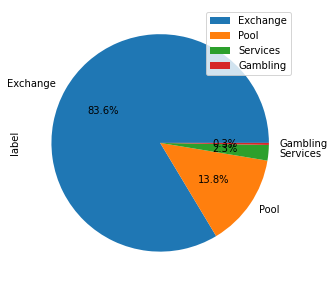

In [ ]:
pf2=pd.DataFrame({'label':[168925,27838,4663,610]},
                index=['Exchange','Pool','Services' ,'Gambling'])
plt=pf2.plot.pie(y='label',autopct='%1.1f%%',figsize=(5,5))

In [ ]:
df=df.dropna()

In [ ]:
df.describe()

,rec/sent,amount,block_id,size,weight,version,lock_time,is_coinbase,has_witness,input_count,output_count,input_total,input_total_usd,output_total,output_total_usd,fee,fee_usd,fee_per_kb,fee_per_kb_usd,fee_per_kwu,fee_per_kwu_usd,cdd_total
count,202036.000000,202036.000000,202036.000000,202036.000000,202036.000000,202036.000000,2.020360e+05,202036.000000,202036.000000,202036.000000,202036.000000,2.020360e+05,2.020360e+05,2.020360e+05,2.020360e+05,2.020360e+05,202036.000000,2.020360e+05,202036.000000,202036.000000,202036.000000,2.020360e+05
mean,0.366910,0.307236,666067.779074,3403.192258,12992.764948,1.408224,1.922102e+05,0.000990,0.356243,7.954840,63.856882,1.357645e+09,4.639493e+05,1.358038e+09,4.640841e+05,2.926448e+05,100.418544,1.006905e+05,34.704942,26833.489267,9.252410,6.620889e+01
std,0.481963,9.004915,1393.875859,6452.402886,23391.344365,0.491506,6.214612e+06,0.031448,0.478890,27.326209,142.504717,2.353376e+10,7.995963e+06,2.353372e+10,7.995950e+06,7.673093e+05,262.847328,6.820983e+04,23.712378,16932.425673,5.905838,4.856492e+03
min,0.000000,0.000005,663913.000000,189.000000,442.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,5.570000e+02,1.625000e-01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-2.405169e-04
25%,0.000000,0.001856,664710.000000,418.000000,1488.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,4.000000,3.847237e+07,1.311057e+04,3.878820e+07,1.321141e+04,4.202200e+04,14.453275,5.454160e+04,18.398800,17894.300000,5.777700,3.050118e-02
50%,0.000000,0.010041,665987.000000,712.000000,2724.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,14.000000,1.870283e+08,6.394469e+04,1.887007e+08,6.396662e+04,8.766000e+04,30.703300,9.792640e+04,33.936600,26868.900000,9.668100,3.835764e-01
75%,1.000000,0.049500,667213.000000,3418.000000,12285.250000,2.000000,6.640220e+05,0.000000,1.000000,2.000000,50.000000,7.216678e+08,2.552241e+05,7.224752e+08,2.551438e+05,2.038500e+05,69.458100,1.353960e+05,47.222200,34078.300000,12.013300,4.923965e+00
max,1.000000,2000.000000,668545.000000,190313.000000,561032.000000,2.000000,1.611268e+09,1.000000,1.000000,970.000000,4231.000000,4.680188e+12,1.654712e+09,4.680187e+12,1.654712e+09,1.197196e+07,4716.833500,2.803740e+06,1034.214800,700935.000000,258.553900,1.444129e+06


In [ ]:
# def label_coder():
#   for i in df['label']:
#     if i=='Exchange':
#       i=0
#     elif i=='Services':
#       i=1
#     elif i=='Pool':
#       i=2
#     else: i=3
# label_coder()
df["label"].replace({"Exchange": 0, "Services": 1,"Pool":2,"Gambling":3}, inplace=True)

In [ ]:
from sklearn import preprocessing
def peenc(df):
  label_encoder=preprocessing.LabelEncoder()
  #df['label']=label_encoder.fit_transform(df['label'])
  df['rec/sent']=label_encoder.fit_transform(df['rec/sent'])
peenc(df) 

In [ ]:
df['label'].value_counts()

0    168925
2     27838
1      4663
3       610
Name: label, dtype: int64

In [ ]:
df=df.drop('balance',axis=1)

In [ ]:
def f1():
  X=df.drop('label',axis=1)
  y=df['label']
  #print(y.value_counts())
  return X,y
X,y=f1()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
def f2():
  X,y=f1()
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
  norm = MinMaxScaler().fit(X_train)
  X_train = norm.transform(X_train)
  X_test = norm.transform(X_test)
  sm = SMOTE(random_state = 2)
  X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
  X_test_res,y_test_res=sm.fit_sample(X_test,y_test.ravel())
  return X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res
X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f2()
def f3():
  return X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res;

In [ ]:
X_test_res.shape

(168608, 22)

In [ ]:
# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')

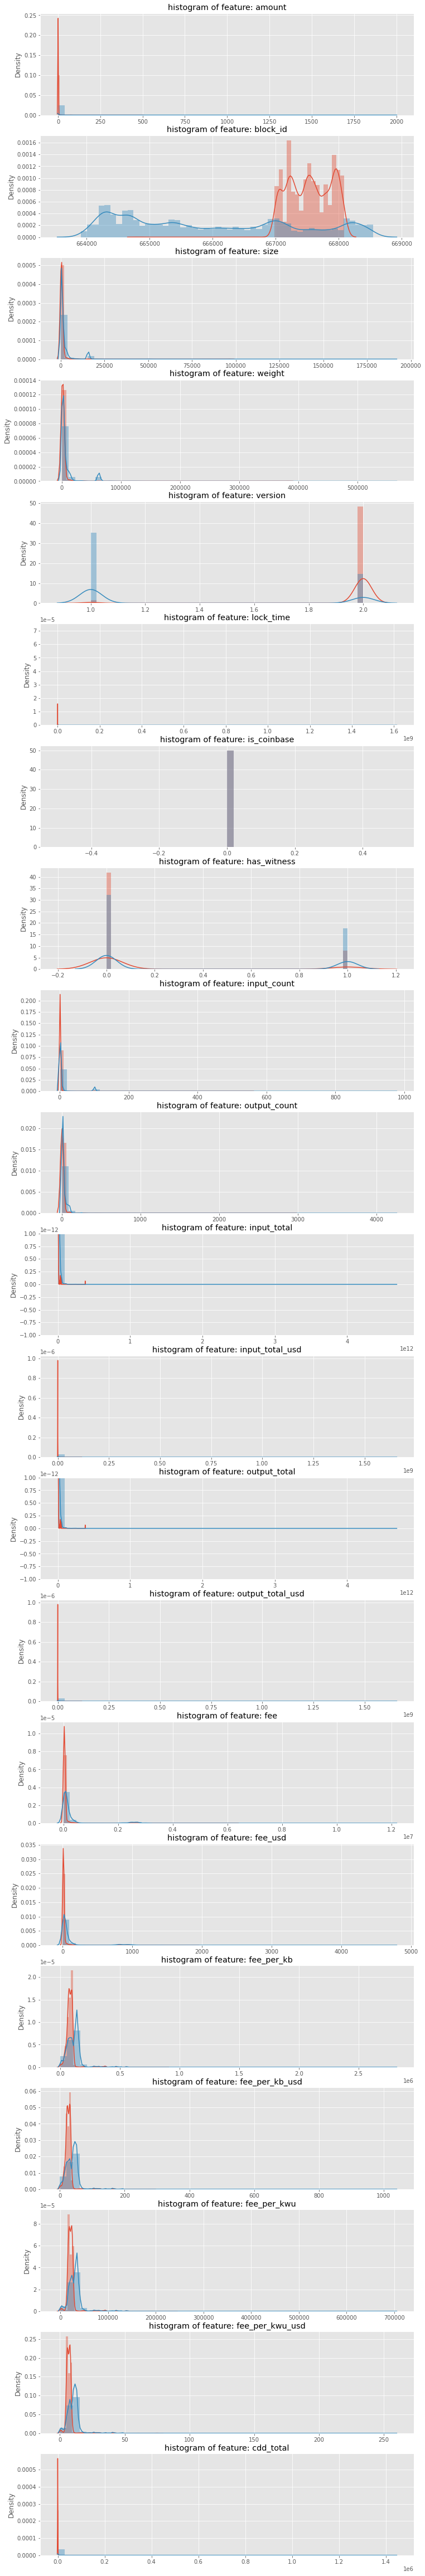

In [ ]:
# visual libraries
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


anomalous_features = df.iloc[:,2:25].columns

plt.figure(figsize=(12,24*4))
gs = gridspec.GridSpec(24, 1)
for i, cn in enumerate(df[anomalous_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.label == 1], bins=50)
    sns.distplot(df[cn][df.label == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

**Decision_Tree**

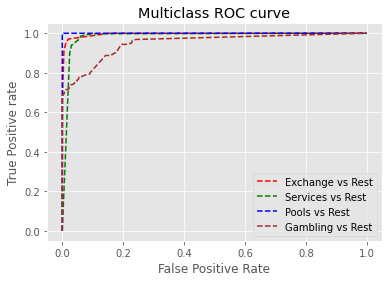

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
def cls1():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
  dtc=DecisionTreeClassifier(criterion='entropy',max_depth=6)
  ovr=OneVsRestClassifier(dtc)
  ovr.fit(X_train,y_train)
  return ovr.predict_proba(X_test),y_test
pp,y_test=cls1()
fpr = {}
tpr = {}
thresh ={}
n_class = 4
X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pp[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Exchange vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Services vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Pools vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='brown', label='Gambling vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=600); 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
def DTC():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f2()
  dtc=DecisionTreeClassifier(criterion='entropy',max_depth=6)
  dtc.fit(X_train,y_train)
  dtc_y=dtc.predict(X_test);
  target_names = ['Exchange', 'Services', 'Pools','Gambling']
  print(classification_report(y_test,dtc_y,target_names=target_names))
  dtc_res=DecisionTreeClassifier(criterion='entropy',max_depth=6)
  dtc_res.fit(X_train_res,y_train_res)
  res_y=dtc_res.predict(X_test_res);
  print(classification_report(y_test_res,res_y,target_names=target_names))
  print("CV Accuracy")
  print(dtc.score(X_test,y_test))
  print("CV Accuracy after SMOTE")
  print(dtc_res.score(X_test_res,y_test_res))
DTC()

              precision    recall  f1-score   support

    Exchange       0.97      1.00      0.99     42390
    Services       0.00      0.00      0.00      1158
       Pools       1.00      1.00      1.00      6814
    Gambling       0.97      0.58      0.72       147

    accuracy                           0.98     50509
   macro avg       0.73      0.64      0.68     50509
weighted avg       0.95      0.98      0.96     50509

              precision    recall  f1-score   support

    Exchange       0.90      0.81      0.85     42390
    Services       0.92      0.96      0.94     42390
       Pools       1.00      1.00      1.00     42390
    Gambling       0.85      0.90      0.88     42390

    accuracy                           0.92    169560
   macro avg       0.92      0.92      0.92    169560
weighted avg       0.92      0.92      0.92    169560

CV Accuracy
0.975331129105704
CV Accuracy after SMOTE
0.9180113234253362


**KNN**

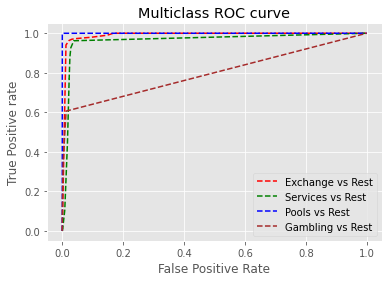

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
def cls1():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
  dtc=KNeighborsClassifier(n_neighbors=10)
  ovr=OneVsRestClassifier(dtc)
  ovr.fit(X_train,y_train)
  return ovr.predict_proba(X_test),y_test
pp,y_test=cls1()
fpr = {}
tpr = {}
thresh ={}
n_class = 4
X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pp[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Exchange vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Services vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Pools vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='brown', label='Gambling vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=600); 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
def cls3():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
  knn=KNeighborsClassifier(n_neighbors=10)
  knn.fit(X_train,y_train)
  knn_y=knn.predict(X_test);
  target_names = ['Exchange', 'Services', 'Pools','Gambling']
  print(classification_report(y_test,knn_y,target_names=target_names))
  knn_res=KNeighborsClassifier(n_neighbors=10)
  knn_res.fit(X_train_res,y_train_res)
  res_y=knn_res.predict(X_test_res);
  print(classification_report(y_test_res,res_y,target_names=target_names))
  print("CV Accuracy")
  print(knn.score(X_test,y_test))
  print("CV Accuracy after SMOTE")
  print(knn_res.score(X_test_res,y_test_res))
cls3()

              precision    recall  f1-score   support

    Exchange       0.97      0.99      0.98     42152
    Services       0.24      0.11      0.15      1213
       Pools       1.00      1.00      1.00      6984
    Gambling       0.67      0.01      0.02       160

    accuracy                           0.97     50509
   macro avg       0.72      0.53      0.54     50509
weighted avg       0.96      0.97      0.96     50509

              precision    recall  f1-score   support

    Exchange       0.73      0.93      0.82     42152
    Services       0.92      0.94      0.93     42152
       Pools       1.00      1.00      1.00     42152
    Gambling       0.94      0.66      0.78     42152

    accuracy                           0.88    168608
   macro avg       0.90      0.88      0.88    168608
weighted avg       0.90      0.88      0.88    168608

CV Accuracy
0.9671147716248589
CV Accuracy after SMOTE
0.8831905959385082


**Random_Forest**

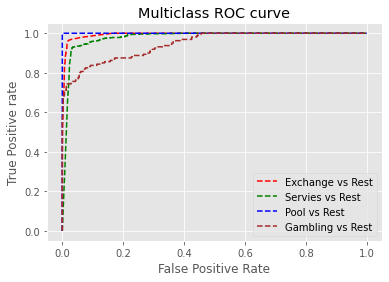

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
def cls1():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
  rf=RandomForestClassifier(max_depth=5,random_state=0)
  ovr=OneVsRestClassifier(rf)
  ovr.fit(X_train,y_train)
  return ovr.predict_proba(X_test),y_test
pp,y_test=cls1()
fpr = {}
tpr = {}
thresh ={}
n_class = 4
X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pp[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Exchange vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Servies vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Pool vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='brown', label='Gambling vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=600); 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
def cls4():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
  rf=RandomForestClassifier(max_depth=5,random_state=0)
  target_names = ['Exchange', 'Services', 'Pools','Gambling']
  rf.fit(X_train,y_train)
  rf_y=rf.predict(X_test)
  print(classification_report(y_test,rf_y,target_names=target_names))
  rfs=RandomForestClassifier(max_depth=5,random_state=0)
  rfs.fit(X_train_res,y_train_res)
  res_y=rfs.predict(X_test_res)
  print(classification_report(y_test_res,res_y,target_names=target_names))
  print(rf.score(X_test,y_test))
  print(rfs.score(X_test_res,y_test_res))
cls4()

              precision    recall  f1-score   support

    Exchange       0.97      1.00      0.98     42152
    Services       0.00      0.00      0.00      1213
       Pools       1.00      1.00      1.00      6984
    Gambling       0.00      0.00      0.00       160

    accuracy                           0.97     50509
   macro avg       0.49      0.50      0.50     50509
weighted avg       0.95      0.97      0.96     50509

              precision    recall  f1-score   support

    Exchange       0.79      0.84      0.82     42152
    Services       0.92      0.93      0.93     42152
       Pools       1.00      1.00      1.00     42152
    Gambling       0.89      0.82      0.85     42152

    accuracy                           0.90    168608
   macro avg       0.90      0.90      0.90    168608
weighted avg       0.90      0.90      0.90    168608

0.9719455938545606
0.8985694628961852


**Adaptive Boosting**

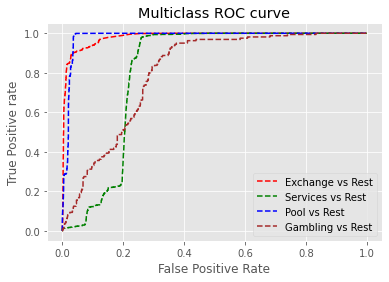

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
def cls1():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
  ab=AdaBoostClassifier(n_estimators=100,random_state=0)
  ovr=OneVsRestClassifier(ab)
  ovr.fit(X_train,y_train)
  return ovr.predict_proba(X_test),y_test
pp,y_test=cls1()
fpr = {}
tpr = {}
thresh ={}
n_class = 4
X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pp[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Exchange vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Services vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Pool vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='brown', label='Gambling vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=600); 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
def cls5():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
  ab=AdaBoostClassifier(n_estimators=100,random_state=0)
  target_names = ['Exchange', 'Services', 'Pools','Gambling']
  ab.fit(X_train,y_train)
  ab_y=ab.predict(X_test)
  print(classification_report(y_test,ab_y,target_names=target_names))
  abs=AdaBoostClassifier(n_estimators=100,random_state=0)
  abs.fit(X_train_res,y_train_res)
  abs_y=abs.predict(X_test_res)
  print(classification_report(y_test_res,abs_y,target_names=target_names))
  print(ab.score(X_test,y_test))
  print(abs.score(X_test_res,y_test_res))
cls5()

              precision    recall  f1-score   support

    Exchange       0.98      0.46      0.63     42152
    Services       0.02      0.10      0.03      1213
       Pools       0.95      0.99      0.97      6984
    Gambling       0.00      0.45      0.01       160

    accuracy                           0.53     50509
   macro avg       0.49      0.50      0.41     50509
weighted avg       0.95      0.53      0.66     50509

              precision    recall  f1-score   support

    Exchange       0.62      0.40      0.48     42152
    Services       0.74      0.65      0.69     42152
       Pools       0.97      0.99      0.98     42152
    Gambling       0.49      0.72      0.58     42152

    accuracy                           0.69    168608
   macro avg       0.71      0.69      0.69    168608
weighted avg       0.71      0.69      0.69    168608

0.5262824447128235
0.6902460144239894


**Gredient_Boosting**

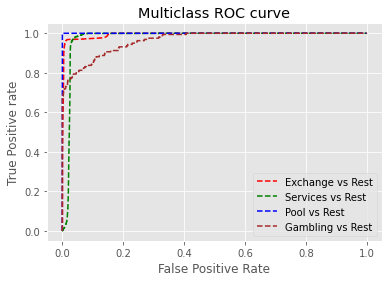

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
def cls1():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
  gcb=gcb=GradientBoostingClassifier(n_estimators=100,max_depth=10,random_state=0)
  ovr=OneVsRestClassifier(gcb)
  ovr.fit(X_train,y_train)
  return ovr.predict_proba(X_test),y_test
pp,y_test=cls1()
fpr = {}
tpr = {}
thresh ={}
n_class = 4
X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pp[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Exchange vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Services vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Pool vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='brown', label='Gambling vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=1200); 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
def cls5():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
  gcb=GradientBoostingClassifier(n_estimators=100,max_depth=10,random_state=0)
  target_names = ['Exchange', 'Services', 'Pools','Gambling']
  gcb.fit(X_train,y_train)
  gcb_y=gcb.predict(X_test)
  print(classification_report(y_test,gcb_y,target_names=target_names))
  gcbs=GradientBoostingClassifier(n_estimators=100,max_depth=10,random_state=0)
  gcbs.fit(X_train_res,y_train_res)
  gcbs_y=gcbs.predict(X_test_res)
  print(classification_report(y_test_res,gcbs_y,target_names=target_names))
  print(gcb.score(X_test,y_test))
  print(gcbs.score(X_test_res,y_test_res))
cls5()

              precision    recall  f1-score   support

    Exchange       0.97      0.98      0.98     42152
    Services       0.16      0.15      0.15      1213
       Pools       1.00      1.00      1.00      6984
    Gambling       0.77      0.68      0.72       160

    accuracy                           0.96     50509
   macro avg       0.72      0.70      0.71     50509
weighted avg       0.96      0.96      0.96     50509

              precision    recall  f1-score   support

    Exchange       0.84      0.97      0.90     42152
    Services       0.92      0.96      0.94     42152
       Pools       1.00      1.00      1.00     42152
    Gambling       0.99      0.81      0.89     42152

    accuracy                           0.93    168608
   macro avg       0.94      0.93      0.93    168608
weighted avg       0.94      0.93      0.93    168608

0.9591755924686689
0.9330102960713608


**ANN**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model =keras.models.Sequential([
    layers.Dense(units=300,activation='relu',input_shape=[22]),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=29,activation ='softmax'),
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer="sgd",
             metrics=['accuracy'])

In [ ]:
X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
model_history=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=750,epochs=45)

Epoch 1/45
203/203 [==============================] - 4s 18ms/step - loss: 2.2096 - accuracy: 0.7808 - val_loss: 0.6356 - val_accuracy: 0.8369
Epoch 2/45
203/203 [==============================] - 3s 16ms/step - loss: 0.5579 - accuracy: 0.8375 - val_loss: 0.4279 - val_accuracy: 0.8369
Epoch 3/45
203/203 [==============================] - 3s 16ms/step - loss: 0.4017 - accuracy: 0.8353 - val_loss: 0.3478 - val_accuracy: 0.8527
Epoch 4/45
203/203 [==============================] - 3s 15ms/step - loss: 0.3328 - accuracy: 0.8809 - val_loss: 0.3073 - val_accuracy: 0.9391
Epoch 5/45
203/203 [==============================] - 3s 15ms/step - loss: 0.3045 - accuracy: 0.9403 - val_loss: 0.2874 - val_accuracy: 0.9492
Epoch 6/45
203/203 [==============================] - 3s 17ms/step - loss: 0.2832 - accuracy: 0.9491 - val_loss: 0.2761 - val_accuracy: 0.9376
Epoch 7/45
203/203 [==============================] - 3s 17ms/step - loss: 0.2737 - accuracy: 0.9408 - val_loss: 0.2684 - val_accuracy: 0.9297

In [ ]:
model_history.history

{'accuracy': [0.8082190155982971,
  0.8366363644599915,
  0.8479017019271851,
  0.9042217135429382,
  0.9357276558876038,
  0.9509856104850769,
  0.9562849998474121,
  0.9503124952316284,
  0.9478839039802551,
  0.9459502100944519,
  0.9450395107269287,
  0.944042980670929,
  0.9446105360984802,
  0.9436337947845459,
  0.9448283314704895,
  0.945151686668396,
  0.9460161924362183,
  0.9460294246673584,
  0.947520911693573,
  0.948926568031311,
  0.9508866667747498,
  0.9520085453987122,
  0.9538828134536743,
  0.9552159309387207,
  0.956779956817627,
  0.9576709270477295,
  0.9593933820724487,
  0.960660457611084,
  0.9624159336090088,
  0.9635312557220459,
  0.9642571806907654,
  0.9656100869178772,
  0.9659400582313538,
  0.9661116600036621,
  0.966204047203064,
  0.9662238359451294,
  0.9664086103439331,
  0.9665868282318115,
  0.9673259258270264,
  0.9678736925125122,
  0.9683554768562317,
  0.9685336351394653,
  0.9686458706855774,
  0.9689032435417175,
  0.9690549969673157],
 'lo

In [ ]:
model.evaluate(X_test,y_test)

1579/1579 [==============================] - 2s 2ms/step - loss: 0.1456 - accuracy: 0.9679


[0.1455579400062561, 0.9678869247436523]

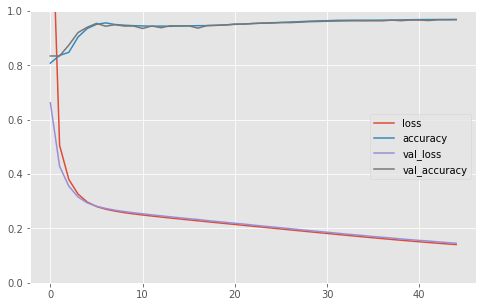

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model_smo =keras.models.Sequential([
    layers.Dense(units=300,activation='relu',input_shape=[22]),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=29,activation ='softmax'),
])

In [ ]:
model_smo.compile(loss='sparse_categorical_crossentropy',
             optimizer="sgd",
             metrics=['accuracy'])

In [ ]:
X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
model_history=model_smo.fit(X_train_res,y_train_res,validation_data=(X_test_res,y_test_res),batch_size=750,epochs=45)

Epoch 1/45
677/677 [==============================] - 16s 23ms/step - loss: 2.0864 - accuracy: 0.4245 - val_loss: 1.0696 - val_accuracy: 0.6104
Epoch 2/45
677/677 [==============================] - 15s 22ms/step - loss: 1.0126 - accuracy: 0.6307 - val_loss: 0.9041 - val_accuracy: 0.6682
Epoch 3/45
677/677 [==============================] - 15s 22ms/step - loss: 0.8724 - accuracy: 0.6679 - val_loss: 0.8188 - val_accuracy: 0.6948
Epoch 4/45
677/677 [==============================] - 15s 22ms/step - loss: 0.7947 - accuracy: 0.6937 - val_loss: 0.7505 - val_accuracy: 0.7188
Epoch 5/45
677/677 [==============================] - 15s 22ms/step - loss: 0.7305 - accuracy: 0.7225 - val_loss: 0.6939 - val_accuracy: 0.7496
Epoch 6/45
677/677 [==============================] - 15s 22ms/step - loss: 0.6771 - accuracy: 0.7485 - val_loss: 0.6375 - val_accuracy: 0.7687
Epoch 7/45
677/677 [==============================] - 15s 22ms/step - loss: 0.6249 - accuracy: 0.7828 - val_loss: 0.5857 - val_accuracy:

In [ ]:
model.evaluate(X_test_res,y_test_res)

5269/5269 [==============================] - 11s 2ms/step - loss: 2.0570 - accuracy: 0.4940


[2.0570223331451416, 0.4939919710159302]

In [ ]:
model_history.history

{'accuracy': [0.5200121402740479,
  0.6450742483139038,
  0.6748321652412415,
  0.7017720937728882,
  0.7279231548309326,
  0.7564781308174133,
  0.7917261719703674,
  0.8118467926979065,
  0.8188849091529846,
  0.8232707381248474,
  0.8256253600120544,
  0.8258481621742249,
  0.8275184631347656,
  0.8285794258117676,
  0.8290448188781738,
  0.8298908472061157,
  0.8308787941932678,
  0.8314841985702515,
  0.8324840664863586,
  0.8333359360694885,
  0.8340123891830444,
  0.8346848487854004,
  0.8353415131568909,
  0.8359587788581848,
  0.8365582823753357,
  0.8370493054389954,
  0.8378933072090149,
  0.8385539650917053,
  0.8393684029579163,
  0.8401039838790894,
  0.8410308361053467,
  0.8416401743888855,
  0.8427858948707581,
  0.8438311219215393,
  0.8450281023979187,
  0.845767617225647,
  0.8472466468811035,
  0.8481005430221558,
  0.8489307761192322,
  0.8499128222465515,
  0.8507667183876038,
  0.8516738414764404,
  0.8519578576087952,
  0.8527880311012268,
  0.8533934950828552]

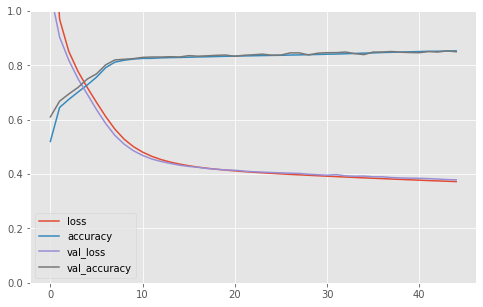

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()